<a href="https://colab.research.google.com/github/Vspotiv/Lab_Discrete/blob/develop/task1/prime_%26_kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usefull code for lab


In [ ]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

###Graph generation


In [2]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

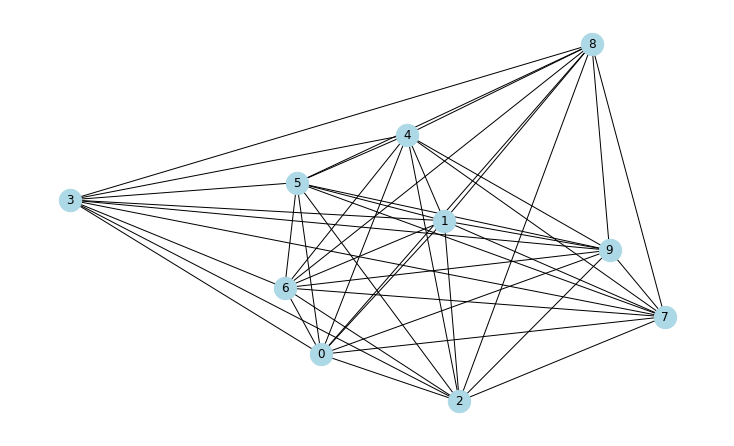

In [84]:
G = gnp_random_connected_graph(10, 1, False, True)

#Algorithms of minimal tree


###Prim's algorithm


In [88]:
def prim_algorithm(G, draw: bool = False):
  len_nodes = len(list(G.nodes()))
  sorted_edges = sorted(G.edges(data=True), key = lambda x: x[2]['weight'])
  edge = sorted_edges[0]
  visited_nodes = {edge[0], edge[1]}
  edges = [edge]
  while len(edges)  < len_nodes - 1:
    for edge in sorted_edges:
      if (edge[0] in visited_nodes) ^ (edge[1] in visited_nodes):
        edges.append(edge)
        visited_nodes.update({edge[0], edge[1]})
        break
  new_G = nx.Graph()
  new_G.add_nodes_from(G.nodes())
  for edge in edges:
    new_G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])
  if draw:
    nx.draw(new_G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
  return new_G
minimal_tree = prim_algorithm(G)
print(minimal_tree.edges(), len(minimal_tree.edges()))





[(0, 1), (0, 24), (0, 36), (0, 77), (0, 94), (1, 48), (1, 15), (1, 87), (2, 29), (2, 11), (2, 64), (3, 10), (3, 29), (3, 51), (3, 13), (4, 21), (4, 8), (4, 23), (4, 49), (5, 77), (5, 21), (6, 81), (6, 20), (7, 21), (7, 35), (8, 98), (9, 94), (9, 31), (9, 32), (10, 34), (10, 74), (11, 96), (11, 71), (12, 36), (12, 46), (14, 57), (16, 29), (17, 75), (18, 31), (18, 56), (18, 39), (19, 21), (21, 22), (21, 63), (22, 76), (25, 43), (25, 28), (25, 81), (26, 63), (26, 65), (27, 97), (28, 60), (28, 80), (29, 83), (29, 90), (30, 98), (30, 34), (30, 41), (30, 58), (33, 78), (33, 59), (34, 82), (35, 75), (37, 94), (37, 86), (38, 39), (40, 63), (40, 69), (42, 68), (43, 71), (44, 76), (45, 63), (45, 79), (45, 88), (46, 93), (46, 89), (47, 77), (47, 52), (48, 50), (48, 92), (48, 95), (48, 97), (49, 85), (53, 87), (53, 68), (54, 95), (55, 80), (55, 78), (57, 82), (57, 61), (60, 67), (62, 95), (65, 91), (66, 92), (69, 84), (70, 87), (72, 91), (73, 88), (81, 99)] 99


#Comperasion with built-in algorithm

In [56]:
from networkx.algorithms import tree

In [54]:
import time
from tqdm import tqdm

In [93]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
time_taken_built = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.5, False)
    
    # start = time.time()
    # prim_algorithm(G)
    # end = time.time()
    
    # time_taken += end - start

    start_built = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end_built = time.time()

    time_taken_built +=  end_built - start_built
    

# print(time_taken / NUM_OF_ITERATIONS)
print(time_taken_built / NUM_OF_ITERATIONS)

100%|██████████| 1000/1000 [00:15<00:00, 66.52it/s]

0.0049931852817535404
